In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sea_ice_drift import SeaIceDrift

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
files = sorted(glob.glob("G:\\My Drive\\Grounded\\*.tif"))

In [8]:
files[:4]

['G:\\My Drive\\Grounded\\S1A_EW_GRDM_1SSH_20190101T014946_20190101T015051_025277_02CBB1_FE3B.tif',
 'G:\\My Drive\\Grounded\\S1A_EW_GRDM_1SSH_20190103T013333_20190103T013437_025306_02CCC1_FD7C.tif',
 'G:\\My Drive\\Grounded\\S1A_EW_GRDM_1SSH_20190104T003634_20190104T003738_025320_02CD39_5DC9.tif',
 'G:\\My Drive\\Grounded\\S1A_EW_GRDM_1SSH_20190105T011709_20190105T011814_025335_02CDCC_AD92.tif']

In [10]:
# set names of files
f1 = 'S1B_EW_GRDM_1SDH_20200123T120618.tif'
f2 = 'S1B_EW_GRDM_1SDH_20200125T114955.tif'
# create SeaIceDrift object
sid = SeaIceDrift(f1, f2)

Cannot add landmask
VMIN:  -22.628240203857423
VMAX:  -9.868122138977043
Cannot add landmask
VMIN:  -23.267868041992188
VMAX:  -10.92607064247131


In [11]:
sid

In [19]:
# run Feature Tracking
uft, vft, lon1ft, lat1ft, lon2ft, lat2ft = sid.get_drift_FT()

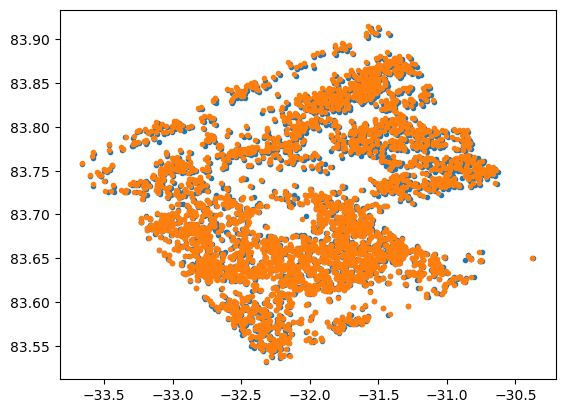

In [20]:
# plot identified and matched keypoints
plt.plot(lon1ft, lat1ft, '.')
plt.plot(lon2ft, lat2ft, '.')

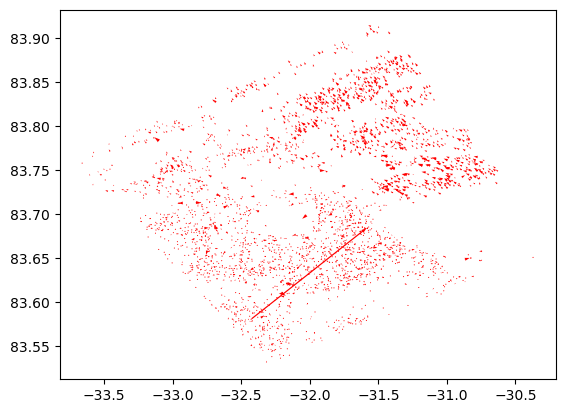

In [21]:
# plot ice drift vectors calculated from the keypoints
plt.quiver(lon1ft, lat1ft, uft, vft, color='r',
           angles='xy', scale_units='xy', scale=1)

Text(0.5, 1.0, 'Latitude grid')

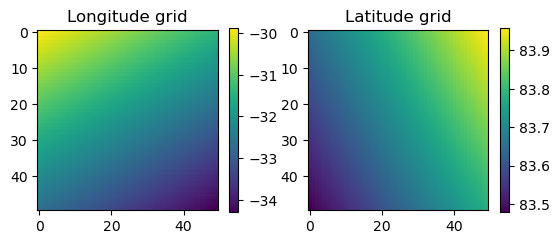

In [22]:
# create longitude and latitude grids at satellite projection
step = 10
lon1pm, lat1pm = sid.n1.get_geolocation_grids(stepSize=step)
plt.subplot(1,2,1);plt.imshow(lon1pm);plt.colorbar(shrink=0.5);plt.title('Longitude grid')
plt.subplot(1,2,2);plt.imshow(lat1pm);plt.colorbar(shrink=0.5);plt.title('Latitude grid')

In [23]:
# run pattern matching
upm, vpm, apm, rpm, hpm, lon2pm, lat2pm = sid.get_drift_PM(
                                    lon1pm, lat1pm,
                                    lon1ft, lat1ft,
                                    lon2ft, lat2ft)

AttributeError: Can't pickle local object 'pattern_matching.<locals>._init_pool'

In [24]:
# plot results of pattern matching

# find cells with correlation over 0.4
gpi = hpm*rpm > 4

# convert lon/lat into cartesian coordinates (only valid)
x1pm, y1pm = sid.n1.transform_points(lon1pm[gpi], lat1pm[gpi], DstToSrc=1)
x2pm, y2pm = sid.n1.transform_points(lon2pm[gpi], lat2pm[gpi], DstToSrc=1)

# compute ice drift speed in cartesian coordinates
dx_pm = x2pm - x1pm
dy_pm = y2pm - y1pm

# plot vectors of sea ice drift from Feature Tracking, color by MCC
plt.figure(figsize=(10,10))
plt.imshow(sid.n1[1], cmap='gray')
plt.quiver(x1pm, y1pm, dx_pm, dy_pm, rpm[gpi],
           angles='xy', scale_units='xy', scale=0.2, cmap='jet')
plt.colorbar(shrink=0.7)

NameError: name 'hpm' is not defined